In [5]:
import networkx as nx

In [6]:
G = nx.karate_club_graph()
type(G)

networkx.classes.graph.Graph

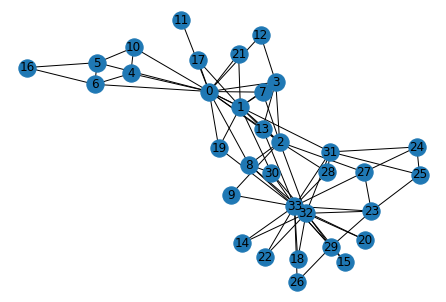

In [7]:
nx.draw(G, with_labels = True)

In [35]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.

    r1 = 0
    for node in G[node_id]:
        r1 += beta * (r0/len(G[node])) + (1-beta)/G.number_of_nodes()
    return round(r1,2)

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print(f"The PageRank value for node 0 after one iteration is {r1}")

The PageRank value for node 0 after one iteration is 0.22


## Avg degree
- The average degree of an undirected graph is used to measure the number of edges compared to the number of nodes. 

In [9]:
def average_degree(num_edges, num_nodes):
    avg_degree = 2*num_edges/num_nodes
    return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print(f"Average degree of karate club network is {avg_degree}")

Average degree of karate club network is 4.588235294117647


## PageRank value: $r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$

# Graph To Tensor

In [1]:
import torch
print(torch.__version__)

1.8.1+cu102


In [3]:
ones = torch.ones(3,4)
print(ones)

zeros = torch.zeros(3,4)
print(zeros)

random_tensor=torch.rand(3,4)
print(random_tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.3216, 0.3145, 0.8306, 0.5261],
        [0.8924, 0.1854, 0.3214, 0.3745],
        [0.8165, 0.0090, 0.7234, 0.4891]])


In [30]:
def graph_to_edge_list(G):
    # TODO: Implement the function that returns the edge list of
    # an nx.Graph. The returned edge_list should be a list of tuples
    # where each tuple is a tuple representing an edge connected 
    # by two nodes.

    edge_list = []

    edge_list = G.edges

    return edge_list

In [30]:
def edge_list_to_tensor(edge_list):
    # TODO: Implement the function that transforms the edge_list to
    # tensor. The input edge_list is a list of tuples and the resulting
    # tensor should have the shape [2 x len(edge_list)].

    edge_index = torch.tensor((2,len(edge_list)))

    for sublist in edge_list:
        torch.add(edge_index, torch.tensor(sublist))

    return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print(f"The pos_edge_index tensor has shape {pos_edge_index.shape}")
print(f"The pos_edge_index tensor has sum value {torch.sum(pos_edge_index)}")

The pos_edge_index tensor has shape torch.Size([2])
The pos_edge_index tensor has sum value 80
